In [6]:
# read source csv files into dataframe
import pandas as pd

high_df = pd.read_csv('../data/high_inc_data.csv')
low_df = pd.read_csv('../data/low_inc_data.csv')

high_df.head(), low_df.head()

(                             NAME  High_med_inc  state  place  \
 0            Hoover city, Alabama        103194      1  35896   
 1  Anchorage municipality, Alaska        100751      2   3000   
 2           Buckeye city, Arizona         95235      4   7940   
 3       Casas Adobes CDP, Arizona         75650      4  10670   
 4          Chandler city, Arizona         98664      4  12000   
 
                    City_x    State                          City_y   Latitude  \
 0             Hoover city  Alabama            Hoover city, Alabama  33.387197   
 1  Anchorage municipality   Alaska  Anchorage municipality, Alaska  61.216313   
 2            Buckeye city  Arizona           Buckeye city, Arizona  33.370320   
 3        Casas Adobes CDP  Arizona       Casas Adobes CDP, Arizona  32.340932   
 4           Chandler city  Arizona          Chandler city, Arizona  33.306203   
 
     Longitude  Store Count  
 0  -86.805680          1.0  
 1 -149.894852          1.0  
 2 -112.583776    

In [7]:
# Import dependencies and API key
import requests, json
from config import geoapify_key

# Set parameters to search for bar (no category for liquor store, use bar instead)
radius = 10000  
categories = "catering.bar"

print("Starting catering.bar search...")

# Iterate through the DataFrame to get bar count for high income cities
for index, row in high_df.iterrows():
    lat, lon = row['Latitude'], row['Longitude']  

    params = {"apiKey": geoapify_key,
              "categories": categories,
             "filter": f"circle:{lon},{lat},{radius}",
             "bias": f"proximity:{lon},{lat}"}

    url = "https://api.geoapify.com/v2/places"
    data = requests.get(url, params=params).json()
   
    # Count the number of bars
    try:
        high_df.loc[index, "Bar Count"] = len(data["features"])
    except (KeyError, IndexError):
        high_df.loc[index, "Bar Count"] = 0

    print(f"{row['NAME']} - # of bars found within 10000m radius: {high_df.loc[index, 'Bar Count']}")

Starting catering.bar search...
Hoover city, Alabama - # of bars found within 10000m radius: 2.0
Anchorage municipality, Alaska - # of bars found within 10000m radius: 19.0
Buckeye city, Arizona - # of bars found within 10000m radius: 0.0
Casas Adobes CDP, Arizona - # of bars found within 10000m radius: 5.0
Chandler city, Arizona - # of bars found within 10000m radius: 20.0
Gilbert town, Arizona - # of bars found within 10000m radius: 20.0
Goodyear city, Arizona - # of bars found within 10000m radius: 2.0
Maricopa city, Arizona - # of bars found within 10000m radius: 0.0
Mesa city, Arizona - # of bars found within 10000m radius: 20.0
Peoria city, Arizona - # of bars found within 10000m radius: 13.0
Phoenix city, Arizona - # of bars found within 10000m radius: 20.0
Queen Creek town, Arizona - # of bars found within 10000m radius: 5.0
San Tan Valley CDP, Arizona - # of bars found within 10000m radius: 1.0
Scottsdale city, Arizona - # of bars found within 10000m radius: 20.0
Surprise city

In [8]:
# check output
high_df.head()

,NAME,High_med_inc,state,place,City_x,State,City_y,Latitude,Longitude,Store Count,Bar Count
0,"Hoover city, Alabama",103194,1,35896,Hoover city,Alabama,"Hoover city, Alabama",33.387197,-86.805680,1.0,2.0
1,"Anchorage municipality, Alaska",100751,2,3000,Anchorage municipality,Alaska,"Anchorage municipality, Alaska",61.216313,-149.894852,1.0,19.0
2,"Buckeye city, Arizona",95235,4,7940,Buckeye city,Arizona,"Buckeye city, Arizona",33.370320,-112.583776,0.0,0.0
3,"Casas Adobes CDP, Arizona",75650,4,10670,Casas Adobes CDP,Arizona,"Casas Adobes CDP, Arizona",32.340932,-111.010201,0.0,5.0
4,"Chandler city, Arizona",98664,4,12000,Chandler city,Arizona,"Chandler city, Arizona",33.306203,-111.841185,12.0,20.0


In [9]:
print("Starting catering.bar search...")

# Iterate through the DataFrame to get bar count for low income cities
for index, row in low_df.iterrows():
    lat, lon = row['Latitude'], row['Longitude']  

    params = {"apiKey": geoapify_key,
              "categories": categories,
             "filter": f"circle:{lon},{lat},{radius}",
             "bias": f"proximity:{lon},{lat}"}

    url = "https://api.geoapify.com/v2/places"
    data = requests.get(url, params=params).json()
   
    # Count the number of bars
    try:
        low_df.loc[index, "Bar Count"] = len(data["features"])
    except (KeyError, IndexError):
        low_df.loc[index, "Bar Count"] = 0

    print(f"{row['NAME']} - # of bars found within 10000m radius: {low_df.loc[index, 'Bar Count']}")

Starting catering.bar search...
Auburn city, Alabama - # of bars found within 10000m radius: 4.0
Birmingham city, Alabama - # of bars found within 10000m radius: 0.0
Dothan city, Alabama - # of bars found within 10000m radius: 0.0
Huntsville city, Alabama - # of bars found within 10000m radius: 16.0
Mobile city, Alabama - # of bars found within 10000m radius: 11.0
Montgomery city, Alabama - # of bars found within 10000m radius: 6.0
Tuscaloosa city, Alabama - # of bars found within 10000m radius: 16.0
Avondale city, Arizona - # of bars found within 10000m radius: 4.0
Flagstaff city, Arizona - # of bars found within 10000m radius: 6.0
Glendale city, Arizona - # of bars found within 10000m radius: 15.0
Tucson city, Arizona - # of bars found within 10000m radius: 20.0
Yuma city, Arizona - # of bars found within 10000m radius: 20.0
Conway city, Arkansas - # of bars found within 10000m radius: 0.0
Fayetteville city, Arkansas - # of bars found within 10000m radius: 20.0
Fort Smith city, Arkan

In [10]:
# check output
low_df.head()

,NAME,Low_med_inc,state,place,City_x,State,City_y,Latitude,Longitude,Store Count,Bar Count
0,"Auburn city, Alabama",54839,1,3076,Auburn city,Alabama,"Auburn city, Alabama",32.601014,-85.516657,0.0,4.0
1,"Birmingham city, Alabama",39326,1,7000,Birmingham city,Alabama,"Birmingham city, Alabama",33.599853,-86.632216,1.0,0.0
2,"Dothan city, Alabama",53929,1,21184,Dothan city,Alabama,"Dothan city, Alabama",31.221808,-85.378001,0.0,0.0
3,"Huntsville city, Alabama",68930,1,37000,Huntsville city,Alabama,"Huntsville city, Alabama",34.729847,-86.585901,0.0,16.0
4,"Mobile city, Alabama",50051,1,50000,Mobile city,Alabama,"Mobile city, Alabama",30.689362,-88.051896,0.0,11.0


In [11]:
# Calculate average bar count in high and low income cities
high_avg = high_df['Bar Count'].mean()
low_avg = low_df['Bar Count'].mean()

print(f"Average Bar Count in High Income Cities: {high_avg}")
print(f"Average Bar Count in Low Income Cities: {low_avg}")

Average Bar Count in High Income Cities: 10.245398773006135
Average Bar Count in Low Income Cities: 11.421875


The r-value is: -0.04721984440205104


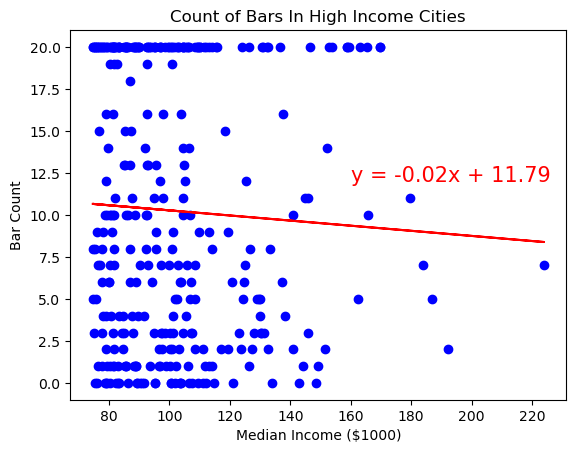

In [23]:
# Scatter Plot and Linear Regression for High Income Cities
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = high_df['High_med_inc']/1000
y = high_df['Bar Count']
plt.scatter(x, y, marker='o', color='b')

(slp, intcp, r, p, se) = linregress(x, y)
reg = x * slp + intcp
if intcp > 0:
    lin_eq = "y = " + str(round(slp,2)) + "x + " + str(round(intcp,2))
else:
    lin_eq = "y = " + str(round(slp,2)) + "x - " + str(round(abs(intcp),2))

plt.plot(x, reg, "r-")
plt.annotate(lin_eq,(160, 12), fontsize=15, color="red")

plt.xlabel('Median Income ($1000)')
plt.ylabel('Bar Count')
plt.title('Count of Bars In High Income Cities')

print(f'The r-value is: {r}')
plt.show()


The r-value is: -0.06833895015369365


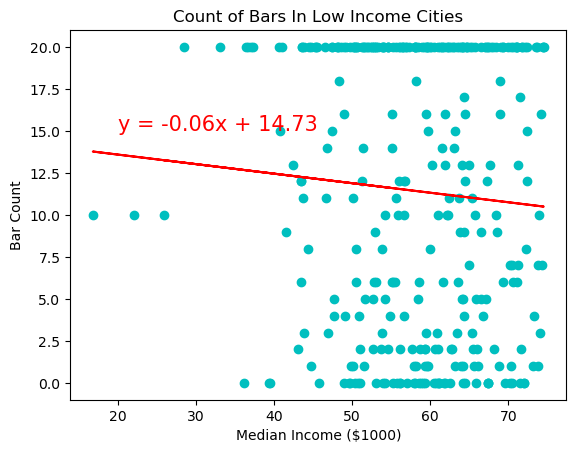

In [30]:
# Scatter Plot and Linear Regression for Low Income Cities
x = low_df['Low_med_inc']/1000
y = low_df['Bar Count']
plt.scatter(x, y, marker='o', color='c')

(slp, intcp, r, p, se) = linregress(x, y)
reg = x * slp + intcp
if intcp > 0:
    lin_eq = "y = " + str(round(slp,2)) + "x + " + str(round(intcp,2))
else:
    lin_eq = "y = " + str(round(slp,2)) + "x - " + str(round(abs(intcp),2))

plt.plot(x, reg, "r-")
plt.annotate(lin_eq,(20, 15), fontsize=15, color="red")

plt.xlabel('Median Income ($1000)')
plt.ylabel('Bar Count')
plt.title('Count of Bars In Low Income Cities')

print(f'The r-value is: {r}')
plt.show()

Conclusion: correlation between income and bar counts in both High and Low groups are very weak and negative.

In [31]:
# Save data to csv

high_df.to_csv("../data/high_inc_weapon_bar.csv", index=False)
low_df.to_csv("../data/low_inc_weapon_bar.csv", index=False)